### Wavelet analize of the Global Electron Content

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, AutoMinorLocator, NullFormatter
import matplotlib.gridspec as gridspec

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
sigma=0.7

In [3]:
# определение ф-ции Морле (Real)
def morleyRe (t):
    m=real(exp(1j*pi*t)*exp(-t**2/(8.*sigma**2)))
    return m

In [4]:
# определение ф-ции Морле (Imag)
def morleyIm(t):
    m=imag(exp(1j*pi*t)*exp(-t**2/(8.*sigma**2)))
    return m

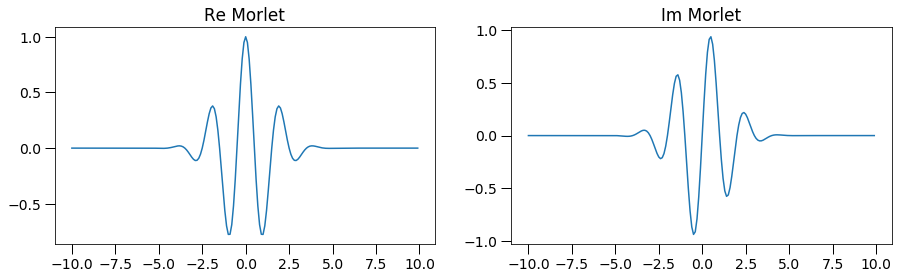

In [22]:
tm=arange(-10,10,0.1)
fig = plt.figure(figsize=(15,4))
gs = gridspec.GridSpec(1, 2)
rcParams['font.size']= 14 #размер шрифта
rcParams['xtick.major.size'] = 10
rcParams['xtick.major.width'] = 1
rcParams['xtick.minor.size'] = 5
rcParams['xtick.minor.width'] = 1
rcParams['ytick.major.size'] = 10
rcParams['ytick.major.width'] = 1
rcParams['ytick.minor.size'] = 5
rcParams['ytick.minor.width'] = 1


ax = fig.add_subplot(gs[:, 0])
plot(tm,morleyRe(tm))
ax.set_title('Re Morlet')
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_minor_locator(MultipleLocator(1))

ax2 = fig.add_subplot(gs[:, 1])
plot(tm,morleyIm(tm))
ax2.set_title('Im Morlet')
ax2.xaxis.set_major_locator(MultipleLocator(5))
ax2.xaxis.set_minor_locator(MultipleLocator(1))
#savefig('Re_Im_Morlet.png')

#### Experimental GEC

In [37]:
data1=loadtxt('GEC_Feb_2008.dat')

In [38]:
N1=len(data1[:,0])
gec1=zeros(N1)      
t1=zeros(N1)
gec1[:]=data1[:,1]
t1[:]=data1[:,0]
b1=zeros(N1)
b1=t1
dt1=t1[1]-t1[0]

a1=arange(dt1,2,dt1)
N12=len(a1)
W1=zeros(N12*N1).reshape(N12,N1)
Wim1=zeros(N12*N1).reshape(N12,N1)
print (len(a1))

24


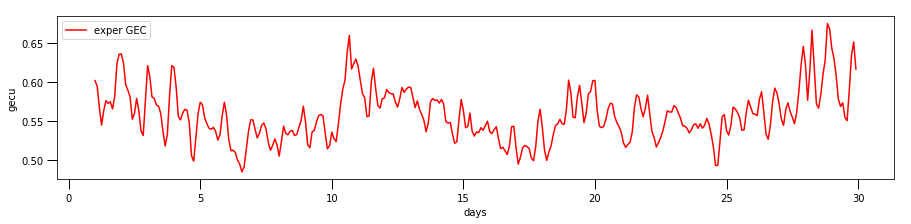

In [39]:
plt.figure(figsize=(15,3))
plt.plot(t1,gec1,'r-',label='exper GEC',)
xlabel('days')
ylabel('gecu')
legend()

#### Removing trends

In [40]:
for i in range(0,N1-1):
    gec1[i]=data1[i+1,1]-data1[i,1]
gec1[N1-1]=gec1[N1-2]

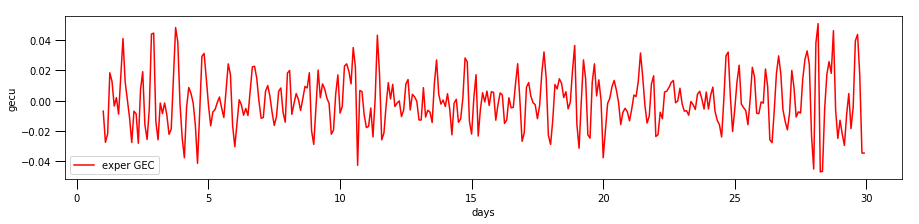

In [41]:
plt.figure(figsize=(15,3))
plt.plot(t1,gec1,'r-',label='exper GEC',)
xlabel('days')
ylabel('gecu')
legend()

### Contineous Wavelet transform

In [42]:
#calculating real wavelet coefficients
for i in range(0,N12):
    for jb in range(0,N1-1):
        sum=0.
        for k in range(0,N1-1):
            sum=sum+gec1[k]*morleyRe((t1[k]-b1[jb])/a1[i])
        W1[i,jb]=sum/sqrt(a1[i])
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23


In [43]:
#calculating imag wavelet coefficients
for i in range(0,N12):
    for jb in range(0,N1-1):
        sum=0.
        for k in range(0,N1-1):
            sum=sum+gec1[k]*morleyIm((t1[k]-b1[jb])/a1[i])
        Wim1[i,jb]=sum/sqrt(a1[i])
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23


In [44]:
# Построчное заполнение массива посчитанными данными
N14 = int(N12/2)
k = 0
Mas1 = zeros(3*N14*N1).reshape(N14*N1,3)    # Массив данных, для использования в Surfer
for i in range(0,N14):                   # Цикл для записси периодов коэффициентов FoF2
    for j in range(0,N1):                # Цикл для записи дней
        Mas1[k,0] = t1[j]                   # Дни
        Mas1[k,1] = a1[i]*2                   # Периоды
        Mas1[k,2] = sqrt(W1[i,j]**2+Wim1[i,j]**2)            # Коэффиценты FoF2
        k = k+1                         # Счётчик строк
#savetxt("waveletGEC_Dec_2007.dat", Mas1)

In [45]:
# Построчное заполнение массива посчитанными данными
k = 0
Mas1 = zeros(3*N12*N1).reshape(N12*N1,3)    # Массив данных, для использования в Surfer
for i in range(0,N14):                   # Цикл для записси периодов коэффициентов FoF2
    for j in range(0,N1):                # Цикл для записи дней
        Mas1[k,0] = b1[j]                   # Дни
        Mas1[k,1] = a1[i]*2                   # Периоды
        Mas1[k,2] = W1[i,j]**2+Wim1[i,j]**2            # Коэффиценты FoF2
        k = k+1                         # Счётчик строк
#savetxt("experiment_sq-waveletGEC.dat", Mas1)

In [46]:
#print(W1)

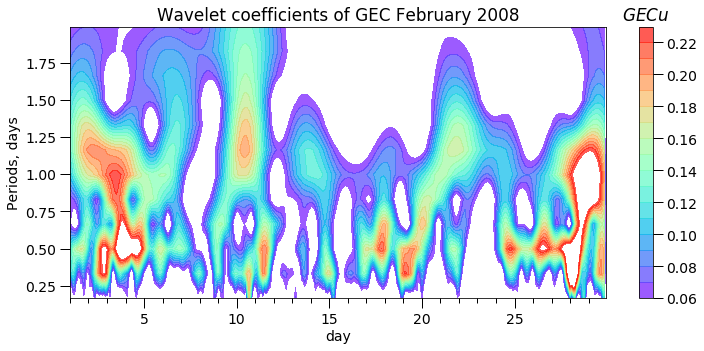

In [52]:
N14=int(N12/2)
figure(figsize=(12,5))
fig, ax = plt.subplots()

rcParams['figure.figsize'] = (12, 5) #размер картинки
# rcParams['lines.linewidth'] = 1 #ширина линии
rcParams['font.size']= 14 #размер шрифта
rcParams['xtick.major.size'] = 10
rcParams['xtick.major.width'] = 1
rcParams['xtick.minor.size'] = 5
rcParams['xtick.minor.width'] = 1
rcParams['ytick.major.size'] = 10
rcParams['ytick.major.width'] = 1
rcParams['ytick.minor.size'] = 5
rcParams['ytick.minor.width'] = 1
scale=arange(0.06,0.24,0.01)
cc = plt.contourf(b1,2*a1[:N14],sqrt(W1[:N14,:]**2+Wim1[:N14,:]**2),levels=scale,cmap=cm.rainbow, alpha=0.7)
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_minor_locator(MultipleLocator(1))
#ax.axvline(x = 20, color = 'black',ls = '--')
xlabel('day')
ylabel('Periods, days')
ax.set_title('Wavelet coefficients of GEC February 2008')
cbar = plt.colorbar(cc)
cbar.ax.set_title(r'$ GECu $')

#savefig('GEC_Feb_2008.png')

#### Square wavelet coefficients (sometimes they look better)

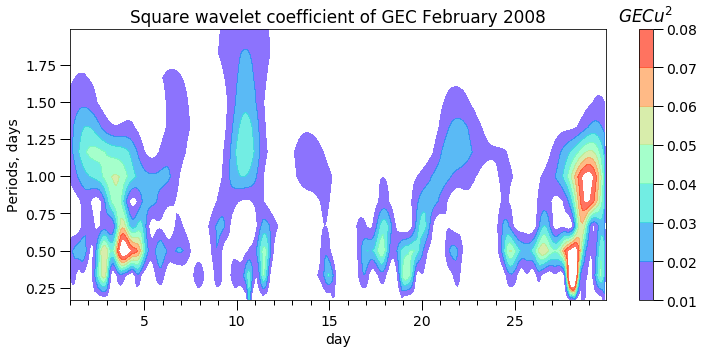

In [48]:
figure(figsize=(12,5))
fig, ax = plt.subplots()

scale=arange(0.01,0.08,0.01)
cc = contourf(b1,2*a1[:N14],W1[:N14,:]**2+Wim1[:N14,:]**2,levels =scale, cmap=cm.rainbow, alpha=0.7)
cbar = plt.colorbar(cc)
rcParams['figure.figsize'] = (12, 5) #размер картинки
# rcParams['lines.linewidth'] = 1 #ширина линии
rcParams['font.size']= 14 #размер шрифта
rcParams['xtick.major.size'] = 10
rcParams['xtick.major.width'] = 1
rcParams['xtick.minor.size'] = 5
rcParams['xtick.minor.width'] = 1
rcParams['ytick.major.size'] = 10
rcParams['ytick.major.width'] = 1
rcParams['ytick.minor.size'] = 5
rcParams['ytick.minor.width'] = 1
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_minor_locator(MultipleLocator(1))
xlabel('day')
ylabel('Periods, days')
#ax.axvline(x = 20, color = 'black', ls = '--')
ax.set_title('Square wavelet coefficient of GEC February 2008')
cbar.ax.set_title(r'$ GECu^2 $')

#savefig('Feb_SQwaveletGEC_2008.png')

### Ebergy and Ratio Spectral Energy

In [49]:
'''WA = (Wim1)**2+W1**2
DE=zeros(N12*N1).reshape(N12,N1)
DEst=zeros(N12*N1).reshape(N12,N1)
DE=sqrt(WA)
DEall=zeros(N1)
for i in range(N1):
    DEall[i] = np.sum(DE[:,i])
    DEst[:,i] = DE[:,i]/DEall[i]'''

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


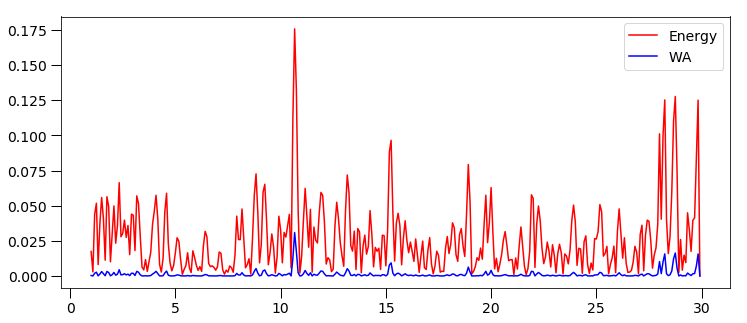

In [50]:
'''plot(b1,DE[0,:],'r-',label='Energy')
plot(b1,WA[0,:], 'b-',label='WA')
legend()'''

In [51]:
'''
fig = plt.figure(figsize=(12,11))
gs = gridspec.GridSpec(2, 1)
ax = fig.add_subplot(gs[0, :])


scale=arange(0.03,0.190,0.005)
cc = contourf(b1,2*a1[:N14],DEst[:N14,:], levels = scale, cmap = cm.rainbow)
cbar = plt.colorbar(cc)
rcParams['figure.figsize'] = (12, 5) #размер картинки
# rcParams['lines.linewidth'] = 1 #ширина линии
rcParams['font.size']= 14 #размер шрифта
rcParams['xtick.major.size'] = 10
rcParams['xtick.major.width'] = 1
rcParams['xtick.minor.size'] = 5
rcParams['xtick.minor.width'] = 1
rcParams['ytick.major.size'] = 10
rcParams['ytick.major.width'] = 1
rcParams['ytick.minor.size'] = 5
rcParams['ytick.minor.width'] = 1
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_minor_locator(MultipleLocator(1))
xlabel('day')
ylabel('Periods, days')
#ax.axvline(x = 20, color = 'black', ls = '--')
ax.set_title('Relative spectral energy of GEC February 2008')

ax2 = fig.add_subplot(gs[1, :])
scale=arange(0.06,0.24,0.01)
ccb = plt.contourf(b1,2*a1[:N14],sqrt(W1[:N14,:]**2+Wim1[:N14,:]**2),levels=scale,cmap=cm.rainbow, alpha=0.7)
rcParams['figure.figsize'] = (12, 5) #размер картинки
# rcParams['lines.linewidth'] = 1 #ширина линии
rcParams['font.size']= 14 #размер шрифта
rcParams['xtick.major.size'] = 10
rcParams['xtick.major.width'] = 1
rcParams['xtick.minor.size'] = 5
rcParams['xtick.minor.width'] = 1
rcParams['ytick.major.size'] = 10
rcParams['ytick.major.width'] = 1
rcParams['ytick.minor.size'] = 5
rcParams['ytick.minor.width'] = 1
ax2.xaxis.set_major_locator(MultipleLocator(5))
ax2.xaxis.set_minor_locator(MultipleLocator(1))
#ax.axvline(x = 20, color = 'black',ls = '--')
xlabel('day')
ylabel('Periods, days')
ax2.set_title('Wavelet coefficients of GEC February 2008')
cbar = plt.colorbar(ccb)
cbar.ax.set_title(r'$ GECu $')
'''

TypeError: __init__() got an unexpected keyword argument 'constrained_layout'